All-atom systems for 5,398 domains, modeled with a state-of-the-art classical force field, and simulated in five replicates each at five temperatures from 320 K to 450 K

In [ ]:
# !git clone https://github.com/compsciencelab/mdCATH.git ../data/mdCATH
# !pip install --upgrade huggingface_hub
# !pip install 'huggingface_hub[cli,torch]'
# !pip install --upgrade huggingface_hub

### TUTORIAL TO GET mdCATH H5 FILES

Use the HuggingFace API to download the mdCATH dataset in H5 format directly from the HuggingFace Hub. In this notebook, we demonstrate how to use the API module for this purpose. Alternatively, you can download the dataset by appending the desired filename to the base URL: `https://huggingface.co/datasets/compsciencelab/mdCATH/resolve/main/`

In [4]:
# COPY-PASTED FROM `data/mdCATH/mdCATH/user/0_get_file_from_hugging_face.ipynb`:

from huggingface_hub import HfApi
from huggingface_hub import hf_hub_download
from huggingface_hub import hf_hub_url

# Initialise the API
api = HfApi()
# Output directory
data_root = '../data/mdCATH'
domain_id = '1r9lA02'
hf_hub_download(repo_id='compsciencelab/mdCATH',
                filename=f'mdcath_dataset_{domain_id}.h5',
                subfolder='data',
                local_dir=data_root,
                repo_type='dataset')

'../data/mdCATH/data/mdcath_dataset_1r9lA02.h5'

In [ ]:
# !conda install -c conda-forge matplotlib
# !conda install -c conda-forge h5py

In [5]:
# COPY-PASTED FROM `data/mdCATH/mdCATH/user/0_get_file_from_hugging_face.ipynb`:

import matplotlib
import h5py as h5
import numpy as np
from os.path import join as opj
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [30]:
with open('../data/mdCATH/mdcath_domains.txt') as f:
    domains = [line.strip() for line in f if line.strip()]
print(len(domains), 'domains listed')
print(domains[:10])


5398 domains listed
['12asA00', '153lA00', '16pkA02', '1a02F00', '1a05A00', '1a0aA00', '1a0hA01', '1a0rP01', '1a0sP00', '1a15A00']


In [6]:
# Specify the case of interest
domain_id = '1r9lA02'
temperature = '379'
repl = '0'

In [8]:
# Load the h5 file
data_dir = '../data/mdCATH/data'
f = h5.File(opj(data_dir, f"mdcath_dataset_{domain_id}.h5"), 'r')
print('Successfully loaded the h5 file')
print(f'dom: {list(f.keys())[0]}')
print(f'layout: {f.attrs["layout"]}')

Successfully loaded the h5 file
dom: 1r9lA02
layout: mdcath-only-protein-v1.0


In [9]:
print(f'molDatasets --> {list(f[domain_id].keys())}')
print(f'molAttrs --> {list(f[domain_id].attrs.keys())}')

molDatasets --> ['320', '348', '379', '413', '450', 'chain', 'element', 'pdb', 'pdbProteinAtoms', 'psf', 'resid', 'resname', 'z']
molAttrs --> ['numChains', 'numProteinAtoms', 'numResidues']


In [10]:
print(domain_id)
print(f"numChains --> {f[domain_id].attrs['numChains']}")
print(f"numProteinAtoms --> {f[domain_id].attrs['numProteinAtoms']}")
print(f"numResidues --> {f[domain_id].attrs['numResidues']}")

1r9lA02
numChains --> 1
numProteinAtoms --> 2165
numResidues --> 141


In [11]:
print(f"z.shape --> {f[domain_id]['z'].shape}")
print(f"z --> {f[domain_id]['z'][:10]}")

z.shape --> (2165,)
z --> [6 1 1 1 6 8 7 1 6 1]


In [12]:
# Get CA idxs from the protein pdb file contained in the h5 file
pdbProteinAtoms = f[domain_id]['pdbProteinAtoms'][()].decode('utf-8').split('\n')[1:-3] # remove header and footer
atomtypes = [line.split()[2] for line in pdbProteinAtoms]
ca_indices = np.where(np.array(atomtypes) == 'CA')[0]
print(f'Number of CA atoms: {len(ca_indices)}')

Number of CA atoms: 141


#### ACCESS PDB AND PSF FILES

In [1]:
print(f"pdbProteinAtoms\n\n{f[domain_id]['pdbProteinAtoms'][()].decode('utf-8')}")

(snippet of the output from above code)
pdbProteinAtoms
```
MODEL        1
ATOM      1  CAY ALA 0  92      -3.090  -3.392 -18.053  0.00  0.00      P0   C
ATOM      2  HY1 ALA 0  92      -3.921  -3.067 -18.503  0.00  0.00      P0   H
ATOM      3  HY2 ALA 0  92      -3.233  -4.316 -17.698  0.00  0.00      P0   H
ATOM      4  HY3 ALA 0  92      -2.328  -3.389 -18.700  0.00  0.00      P0   H
ATOM      5  CY  ALA 0  92      -2.873  -2.781 -17.291  0.00  0.00      P0   C
ATOM      6  OY  ALA 0  92      -2.041  -3.106 -16.840  0.00  0.00      P0   O
```

In [2]:
print(f"PDB\n\n{f[domain_id]['pdb'][()].decode('utf-8')}")

(snippet of the output from above code)
```
0      WT0  H
ATOM   8052  OH2 TIP3W2851     -11.568   2.211  21.447  1.00  0.00      WT0  O
ATOM   8053  H1  TIP3W2851     -10.803   2.414  20.921  1.00  0.00      WT0  H
ATOM   8054  H2  TIP3W2851     -11.769   3.026  21.889  1.00  0.00      WT0  H
ATOM   8055  OH2 TIP3W2853     -14.756   1.646  10.748  1.00  0.00      WT0  O
ATOM   8056  H1  TIP3W2853     -14.371   1.879   9.898  1.00  0.00      WT0  H
ATOM   8057  H2  TIP3W2853     -14.280   2.233  11.390  1.00  0.00      WT0  H
ATOM   8058  OH2 TIP3W2855     -28.856  -8.030  28.104  1.00  0.00      WT0  O
```

In [2]:
print(f"PSF\n\n{f[domain_id]['psf'][()].decode('utf-8')}")

(snippet of the output from above code)
```
TIP3 H2   HT     0.417000        1.0080           0
   18381 WT0  7922 TIP3 OH2  OT    -0.834000       15.9994           0
   18382 WT0  7922 TIP3 H1   HT     0.417000        1.0080           0
   18383 WT0  7922 TIP3 H2   HT     0.417000        1.0080           0
   18384 WT0  7923 TIP3 OH2  OT    -0.834000       15.9994           0
   18385 WT0  7923 TIP3 H1   HT     0.417000        1.0080           0
   18386 WT0  7923 TIP3 H2   HT     0.417000        1.0080           0
   18387 WT0  7924 TIP3 OH2  OT    -0.834000       15.9994           0
   18388 WT0  7924 TIP3 H1   HT     0.417000        1.0080           0
```

#### ACCESS TRAJECTORY DATA

In [ ]:
#### ACCESS TRAJECTORY DATA
print(f'available replicas ({temperature}K) --> {list(f[domain_id][temperature].keys())}')
print(f'attrs ({temperature}K) --> {list(f[domain_id][temperature].attrs.keys())}')

In [17]:
for key, data in f[domain_id][temperature][str(repl)].items():
    print(f'prop {key} --> {data.shape}')
    for attr in data.attrs.keys():
        print(f'{attr} --> {data.attrs[attr]}')
    print('')

prop box --> (3, 3)

prop coords --> (440, 2165, 3)
unit --> Angstrom

prop dssp --> (440, 141)
unit --> nm

prop forces --> (440, 2165, 3)
unit --> kcal/mol/Angstrom

prop gyrationRadius --> (440,)
unit --> nm

prop rmsd --> (440,)
unit --> nm

prop rmsf --> (141,)



In [18]:
# Each replica contains the number of frames (numFrames) as attributes
for replattr in f[domain_id][temperature][str(repl)].attrs.keys():
    print(f'{replattr} --> {f[domain_id][temperature][str(repl)].attrs[replattr]}')

numFrames --> 440


In [19]:
# Get the number of frames for each replica
for sims_name in ["320", "348", "379", "413", "450"]:
    for repln in range(5):
        print(f"{sims_name} Replica {repln} --> {f[domain_id][sims_name][str(repln)].attrs['numFrames']}")

320 Replica 0 --> 450
320 Replica 1 --> 450
320 Replica 2 --> 430
320 Replica 3 --> 450
320 Replica 4 --> 440
348 Replica 0 --> 440
348 Replica 1 --> 440
348 Replica 2 --> 450
348 Replica 3 --> 450
348 Replica 4 --> 440
379 Replica 0 --> 440
379 Replica 1 --> 440
379 Replica 2 --> 440
379 Replica 3 --> 450
379 Replica 4 --> 450
413 Replica 0 --> 450
413 Replica 1 --> 440
413 Replica 2 --> 440
413 Replica 3 --> 440
413 Replica 4 --> 440
450 Replica 0 --> 450
450 Replica 1 --> 450
450 Replica 2 --> 450
450 Replica 3 --> 440
450 Replica 4 --> 450


#### VISUALIZE TRAJECTORY DATA ANALYSIS

In [20]:
rmsd = f[domain_id][temperature][str(repl)]['rmsd'][:] # shape (numFrames,)
rmsf = f[domain_id][temperature][str(repl)]['rmsf'][:] # shape (numResidues)
gyration_radius = f[domain_id][temperature][str(repl)]['gyrationRadius'][:] # shape (numFrames,)

print(f"rmsd.shape --> {rmsd.shape}")
print(f"rmsf.shape --> {rmsf.shape}")
print(f"gyration_radius.shape --> {gyration_radius.shape}")

rmsd.shape --> (440,)
rmsf.shape --> (141,)
gyration_radius.shape --> (440,)


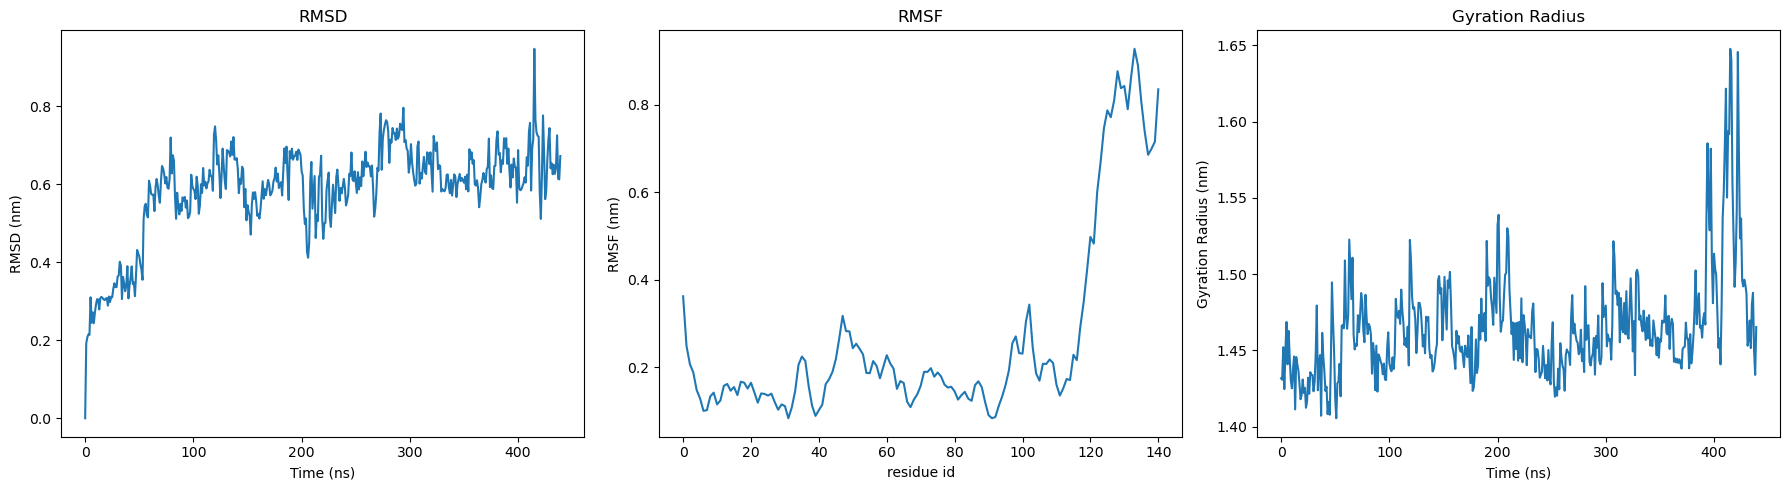

In [21]:
# plot rmsd, rmsf, gyration radius

time = np.arange(0, len(rmsd)) # time in ns
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs = axs.flatten()
last_frame =  rmsd.shape[0]
##
axs[0].plot(time[:last_frame], rmsd[:last_frame])
axs[0].set_title('RMSD')
axs[0].set_ylabel('RMSD (nm)')
axs[0].set_xlabel('Time (ns)')
##
axs[1].plot(rmsf)
axs[1].set_title('RMSF')
axs[1].set_ylabel('RMSF (nm)')
axs[1].set_xlabel('residue id')
##
axs[2].plot(time, gyration_radius)
axs[2].set_title('Gyration Radius')
axs[2].set_ylabel('Gyration Radius (nm)')
axs[2].set_xlabel('Time (ns)')

plt.tight_layout()
plt.show()

In [22]:
# DSSP
simplified = False # if True, the DSSP is simplified to 3 states (H, E, C)
encoded_dssp = f[domain_id][temperature][str(repl)]['dssp'] # shape (numFrames, numResidues)
print(f"encoded_dssp.shape --> {encoded_dssp.shape}")

encoded_dssp.shape --> (440, 141)


In [23]:
floatMap = {'C': 0, 'E': 1, 'H': 2} if simplified else {"H": 0, "B": 1, "E": 2, "G": 3, "I": 4, "T": 5, "S": 6, " ": 7}
dssp_decoded_float = np.zeros((encoded_dssp.shape[0], encoded_dssp.shape[1]), dtype=np.float32)
for i in range(encoded_dssp.shape[0]):
    dssp_decoded_float[i] = [floatMap[el.decode()] for el in encoded_dssp[i]]
print(f"dssp_decoded.shape --> {dssp_decoded_float.shape}")

dssp_decoded.shape --> (440, 141)


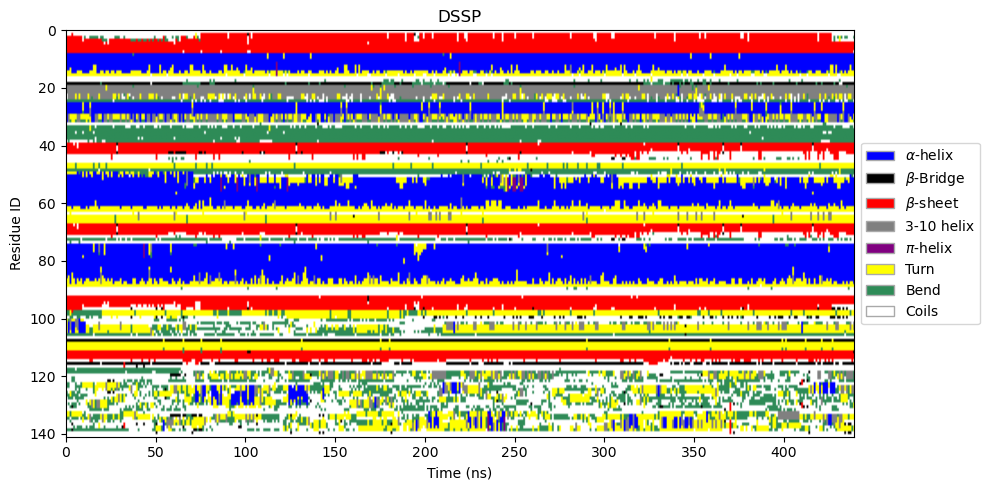

In [24]:
color_list = ["blue", "black", "red", "grey", "purple", "yellow", "seagreen", "white"]
cmap = matplotlib.colors.ListedColormap(color_list)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
xtime = np.arange(0, len(dssp_decoded_float))
x_min, x_max = xtime[0], xtime[-1]
extent = [x_min, x_max, len(dssp_decoded_float.T), 0]

cax = ax.imshow(dssp_decoded_float.T, aspect='auto', cmap=cmap, extent=extent)
labels = ["$\\alpha$-helix", "$\\beta$-Bridge", "$\\beta$-sheet", "3-10 helix", "$\\pi$-helix", "Turn", "Bend", "Coils"]
handles = [mpatches.Patch(facecolor=color_list[i], label=labels[i], edgecolor="darkgrey") for i in range(len(color_list))]
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('DSSP')
plt.xlabel('Time (ns)')
plt.ylabel('Residue ID')
plt.tight_layout()
plt.show()

#### COORDINATES AND FORCES

In [25]:
coords = f[domain_id][temperature][str(1)]["coords"]#[:,ca_indices,:]
forces = f[domain_id][temperature][str(1)]["forces"]#[:,ca_indices,:]
print(f'coords --> {coords.shape}, units: {f[domain_id][temperature]["0"]["coords"].attrs["unit"]}')
print(f'forces --> {forces.shape}, units: {f[domain_id][temperature]["0"]["forces"].attrs["unit"]}')

coords --> (440, 2165, 3), units: Angstrom
forces --> (440, 2165, 3), units: kcal/mol/Angstrom


In [26]:
def plot_box(box, ax, origin=[0, 0, 0]):
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

    # Compute original vertices centered at the origin
    vertices = np.array([[-box[0][0]/2, -box[1][1]/2, -box[2][2]/2],
                        [box[0][0]/2, -box[1][1]/2, -box[2][2]/2],
                        [-box[0][0]/2, box[1][1]/2, -box[2][2]/2],
                        [box[0][0]/2, box[1][1]/2, -box[2][2]/2],
                        [-box[0][0]/2, -box[1][1]/2, box[2][2]/2],
                        [box[0][0]/2, -box[1][1]/2, box[2][2]/2],
                        [-box[0][0]/2, box[1][1]/2, box[2][2]/2],
                        [box[0][0]/2, box[1][1]/2, box[2][2]/2]])

    # Translate vertices to make the box center at 'origin'
    vertices = vertices + origin

    # List of sides' vertices indices
    edges = [
        [vertices[0], vertices[1], vertices[3], vertices[2]],  # Bottom face
        [vertices[4], vertices[5], vertices[7], vertices[6]],  # Top face
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # Front face
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # Back face
        [vertices[0], vertices[2], vertices[6], vertices[4]],  # Left face
        [vertices[1], vertices[3], vertices[7], vertices[5]]   # Right face
    ]

    # Create a 3D polygon collection for the faces
    faces = Poly3DCollection(edges, linewidths=1, edgecolors='k', alpha=0.1)
    ax.add_collection3d(faces)

    # Plot the vertices
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], s=5, color='r')

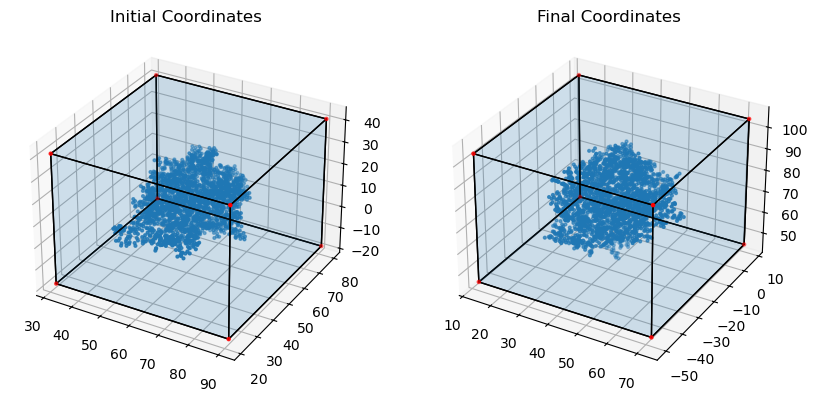

In [27]:
# Plot initial and final coordinates inside the box
box = f[domain_id][temperature][str(repl)]["box"][:] * 10 # nm -> A

fig = plt.figure(figsize=(10, 5))

# initial conformation
init_coords = coords[0]
init_coords_barycenter = np.mean(init_coords, axis=0)
ax = fig.add_subplot(121, projection='3d')
ax.set_title('Initial Coordinates')
ax.scatter(init_coords[:,0], init_coords[:,1], init_coords[:,2], s=4)
plot_box(box, ax, init_coords_barycenter)

# final conformation
end_coords = coords[-1]
end_coords_barycenter = np.mean(end_coords, axis=0)
ax1 = fig.add_subplot(122, projection='3d')
ax1.set_title('Final Coordinates')
ax1.scatter(end_coords[:,0], end_coords[:,1], end_coords[:,2], s=4)
plot_box(box, ax1, end_coords_barycenter)

plt.show()

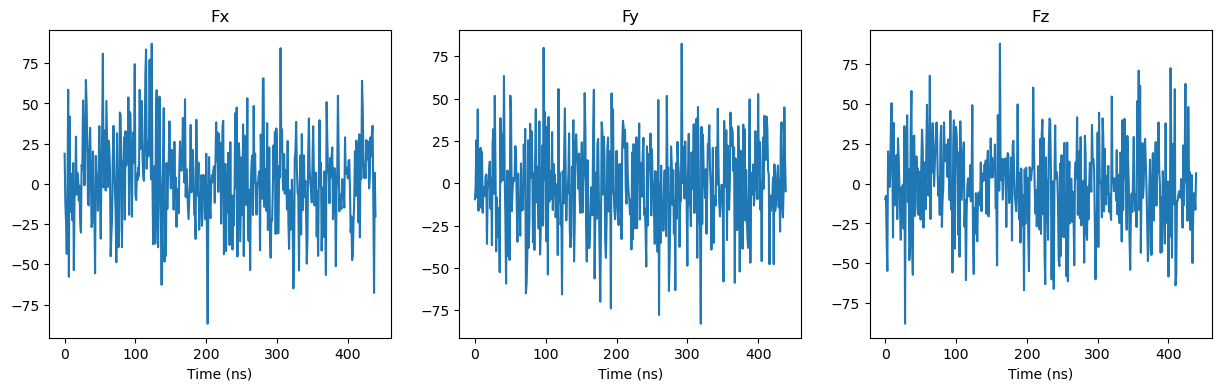

In [28]:
# Plot forces component for a given atom along time
atom_id = 50
fig = plt.figure(figsize=(15, 4))
comps = ['x', 'y', 'z']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(f'F{comps[i]}')
    plt.plot(forces[:, atom_id, i])
    plt.xlabel('Time (ns)')
plt.show()

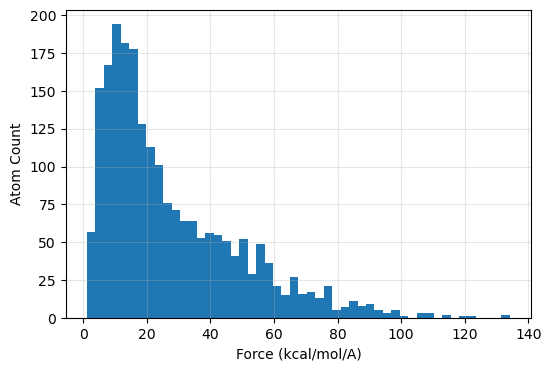

In [29]:
# histogram of forces for a given frame
frame_i = 3
plt.figure(figsize=(6,4))
normForces = np.linalg.norm(forces[frame_i], axis=1)
plt.hist(normForces, bins=50)
plt.ylabel("Atom Count")
plt.xlabel("Force (kcal/mol/A)")
plt.grid(alpha=0.3)
plt.show()

### mdCATH DATASET IN MACHINE LEARNING FRAMEWORK

This tutorial provides a practical example of training ML models using the mdCATH dataset in TorchMD-Net. Before you begin, please ensure that TorchMD-Net is correctly installed. You can find installation instructions and further details [here](https://torchmd-net.readthedocs.io/en/latest/installation.html). Note that the MDCATH dataloader is available starting from TorchMD-Net version 2.4.0 and later.

In [ ]:
import os
import torch
import lightning.pytorch as pl
from torchmdnet.data import DataModule
from torchmdnet.module import LNNP
from torchmdnet.scripts.train import get_args
from lightning.pytorch.callbacks import TQDMProgressBar, ModelCheckpoint
from lightning.pytorch.loggers import CSVLogger

In [ ]:
# Define the arguments
args = get_args() # default arguments by tmdnet
args = vars(args) # convert to dictionary

pargs = {
    # DATA
    'dataset': 'MDCATH',
    'dataset_arg':{
      'numAtoms': None,
      'numResidues': None,
      'pdb_list': ['1balA00', '1ce3A00', '1e8rA00'],
      'temperatures': ['348'],
      'skip_frames': 2,
      'solid_ss': None,
      },
    'dataset_root': 'data',
    # MODEL
    'model': 'tensornet',
    'embedding_dimension': 32,
    'num_layers': 0,
    'num_rbf': 8,
    'rbf_type': 'expnorm',
    'activation': 'silu',
    'cutoff_lower': 0.0,
    'cutoff_upper': 5.0,
    'max_z': 20,
    'num_epochs': 10,
    'max_num_neighbors': 48,
    'derivative': True,
    # TRAIN
    'batch_size': 3,
    'train_size': 200,
    'val_size': 50,
    'test_size': 100,
    'lr': 1e-3,
    'lr_metric': 'val',
    'log_dir': 'logs/',
    'check_errors': True,
    'static_shapes': False,
    'num_workers': 2,
}

# Update the default arguments with the new ones
args.update(pargs)
os.makedirs(args['log_dir'], exist_ok=True)

In [ ]:
# Here MDCATH torch_geometric dataset class is used
# If the h5 files are not present in the 'dataset_root' then they will be downloaded from HF
# The downlaoad process can take some time

data = DataModule(args)
data.prepare_data()
data.setup("fit")

In [ ]:
# Lightning wrapper for the Neural Network Potentials in TorchMD-Net
lnnp = LNNP(args,
    prior_model=None,
    mean=data.mean,
    std=data.std)

In [ ]:
# Callbacks, used to save model ckpts
val_loss_name = 'val_total_mse_loss'
checkpoint_callback = ModelCheckpoint(dirpath=args['log_dir'],
                                      monitor=val_loss_name,
                                      every_n_epochs=2,
                                      filename=f"epoch={{epoch}}-val_loss={{{val_loss_name}:.4f}}",
                                      save_top_k=3)

In [ ]:
# Logger for the training process, it will save the training logs in a csv file
csv_logger = CSVLogger(args['log_dir'], name="", version="")

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
print(f'cuda available: {torch.cuda.is_available()}')
print(f'cuda device count: {torch.cuda.device_count()}')
print(f'CUDA_VISIBLE_DEVICES ID: {os.environ["CUDA_VISIBLE_DEVICES"]}')

In [ ]:
# Train
trainer = pl.Trainer(strategy="auto",
                     devices=1,
                     max_epochs=args['num_epochs'],
                     precision=args['precision'],
                     default_root_dir = args['log_dir'],
                     logger=csv_logger,
                     callbacks=[checkpoint_callback, TQDMProgressBar(refresh_rate=1)])

trainer.fit(lnnp, data, ckpt_path=None)

In [ ]:
# Test
model = LNNP.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)
trainer = pl.Trainer(inference_mode=False)
trainer.test(model, data)